In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster', font_scale=1.25)

We are solving

$$\frac{df}{dt}=-(\vec{v}\cdot \nabla)f + D \nabla^2 f + sf(1-f)$$

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from adr_1d.solver import Solver

In [8]:
dt=0.005
dx=1
imax = 3000
jmax=500

# We can actually specify spatially dependent velocity which is cool
v = 5*np.ones(jmax, dtype=np.double)

D=1.
s=0.5

s = Solver(imax=imax,
          jmax=jmax,
          dt=dt,
          dx=dx,
          v=v,
          D=D,
          s=s)

In [9]:
result = s.run()

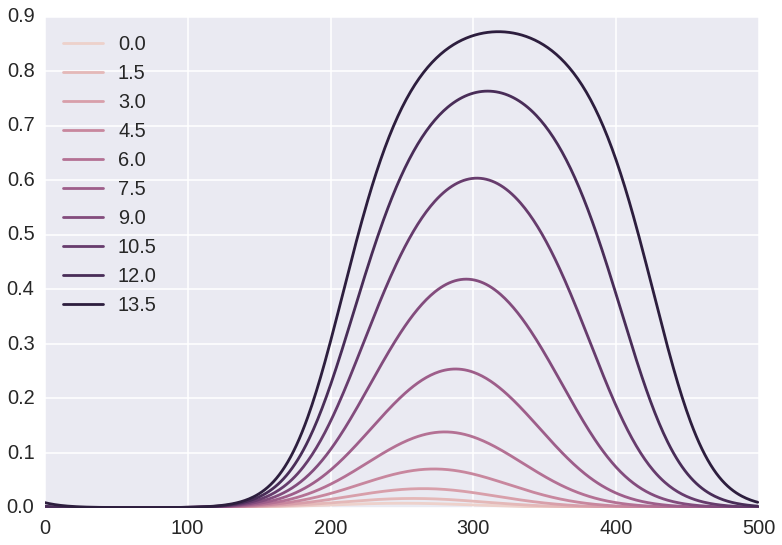

In [10]:
spacing = 300

num_colors = result.shape[1]/spacing
colors = sns.cubehelix_palette(num_colors)

color_count = 0
for i in range(0, result.shape[1], spacing):
    plt.plot(s.xgrid, result[:, i], color=colors[color_count], label=i*s.dt)
    color_count += 1
    
plt.legend(loc='best')

plt.savefig('../examples/1d_adr_example.png', dpi=200, bbox_inches='tight')

Cool! This looks correct. There is another cool way to visualize this. A way more analagous to my research!

In [21]:
import skimage as ski
import skimage.io

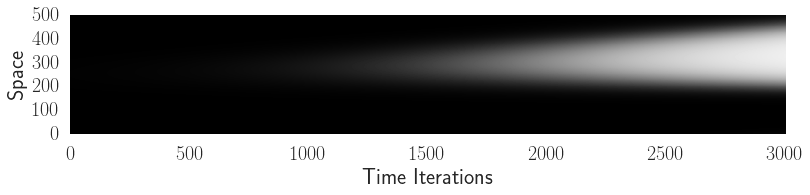

In [35]:
ski.io.imshow(result, origin='lower')
plt.grid(False)

plt.xlabel('Time Iterations')
plt.ylabel('Space')

plt.savefig('../examples/1d_adr_solution_history.png', dpi=200, bbox_inches='tight')